# Using ML to predict car prices

In [1]:
import pandas as pd
import dtale
import numpy as np
#https://archive.ics.uci.edu/ml/datasets/automobile
header = ["symboling", "normalized-losses", "make", "fuel-type", "aspiration", "num-of-doors", "body-style", "drive-wheels",
         "engine-location", "wheel-base", "length", "width", "height", "curb-weight", "engine-type", "num-of-cylinders", "engine-size", 
         "fuel-system", "bore", "stroke", "compression-ratio", "horsepower", "peak-rpm", "city-mpg", "highway-mpg", "price"]
        
cars_data = pd.read_csv("imports-85.data", names=header)

In [2]:
#select suitibale columns for ML algo (k nearest neighbor)
col_continous = ["normalized-losses", "wheel-base", "length", "width", "height", "curb-weight", 
                 "bore", "stroke", "compression-ratio", "horsepower", "peak-rpm", "city-mpg", "highway-mpg", "price"]
cars_clean = cars_data[col_continous]
cars_clean

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,95,109.1,188.8,68.9,55.5,2952,3.78,3.15,9.5,114,5400,23,28,16845
201,95,109.1,188.8,68.8,55.5,3049,3.78,3.15,8.7,160,5300,19,25,19045
202,95,109.1,188.8,68.9,55.5,3012,3.58,2.87,8.8,134,5500,18,23,21485
203,95,109.1,188.8,68.9,55.5,3217,3.01,3.40,23.0,106,4800,26,27,22470


## Data Cleaning

In [3]:
cars_clean = cars_clean.replace("?", np.NaN)
cars_clean.dtypes # to identidy which column we need to convert
cars_clean = cars_clean.astype("float64")

#check the count of NaN values
cars_clean.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [4]:
#remove rows with missing value for price because we want to predict the price
cars_clean = cars_clean[cars_clean["price"].notnull()]
cars_clean.isnull().sum()

normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [5]:
#replace remaining missing values with column mean
cars_clean = cars_clean.fillna(cars_clean.mean())
cars_clean.isnull().sum()
#no missing value left

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [6]:
#normalize values
price = cars_clean["price"]
# normalized_df=(cars-cars.mean())/cars.std()
cars=(cars_clean-cars_clean.min())/(cars_clean.max()-cars_clean.min())
cars["price"]=price
cars

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.12500,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.12500,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.100000,0.666667,0.12500,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.464286,0.633333,0.18750,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.464286,0.633333,0.06250,0.313084,0.551020,0.138889,0.157895,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.157068,0.655977,0.711940,0.735043,0.641667,0.567882,0.885714,0.514286,0.15625,0.308411,0.510204,0.277778,0.315789,16845.0
201,0.157068,0.655977,0.711940,0.726496,0.641667,0.605508,0.885714,0.514286,0.10625,0.523364,0.469388,0.166667,0.236842,19045.0
202,0.157068,0.655977,0.711940,0.735043,0.641667,0.591156,0.742857,0.380952,0.11250,0.401869,0.551020,0.138889,0.184211,21485.0
203,0.157068,0.655977,0.711940,0.735043,0.641667,0.670675,0.335714,0.633333,1.00000,0.271028,0.265306,0.361111,0.289474,22470.0


## univariate k-nearest neighbors models

In [7]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

def knn_train_test(k, train_col, target_col, df):
    x_train, x_test, y_train, y_test = train_test_split(df[[train_col]], df[[target_col]], test_size=0.25, random_state=1)
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(x_train, y_train)
    prediction = knn.predict(x_test)
    rmse = np.sqrt(mean_squared_error(y_test, prediction))
    return rmse


#activate  next 2 rows in first run:
col_features = col_continous
col_features.remove("price")


rmse_dict = dict.fromkeys(col_features, 0)
rmse_results = pd.DataFrame(index = rmse_dict.keys())

k_values = np.arange(1,11)

for k in k_values: 
    for col in col_continous:
        rmse_dict[col] = knn_train_test(k, col, "price", cars)
        rmse_results["k=%i"%k] = rmse_dict.values()

rmse_results


,k=1,k=2,k=3,k=4,k=5,k=6,k=7,k=8,k=9,k=10
normalized-losses,9767.500143,6518.286123,6025.784830,6114.677643,6287.165338,6460.340896,6737.153674,6728.362967,6728.041569,6689.631905
wheel-base,3431.347083,4378.653841,4334.883842,4884.408441,4942.417613,5007.685290,4800.182143,5004.512822,5082.712705,5125.745025
length,5146.543155,5064.076318,4928.173290,4065.217552,3929.287813,3942.584904,4119.880868,4263.847610,4177.546218,4158.035226
width,4036.070585,3827.622337,3700.869821,3846.819773,3937.650346,3848.277833,3755.791800,3687.736291,3570.176165,3517.283731
height,10126.699958,7341.013769,6951.962369,7377.813212,7724.860453,8223.235973,8054.833819,7836.807105,7481.322032,7150.411972
curb-weight,5000.401643,4110.781425,3982.867188,4017.839426,3846.121150,3670.538480,3579.829153,3263.240081,3318.738145,3424.516702
bore,9212.383981,7385.687052,6848.331608,6726.873108,6642.258305,6618.224666,6641.394106,6277.551933,6187.322518,6305.768482
stroke,10805.186120,8323.432533,7283.081378,6599.575221,6483.215850,6670.516341,6802.551448,6913.975820,6849.499106,6978.241602
compression-ratio,6378.364745,5086.792850,5612.717028,5766.868446,6567.353117,6446.939307,6200.014292,6549.640755,6253.086258,6172.837879
horsepower,3274.848061,3648.998863,3469.091557,3477.306079,3309.547325,3258.195277,3229.901320,3460.434091,3639.442184,3830.231466


## plot results

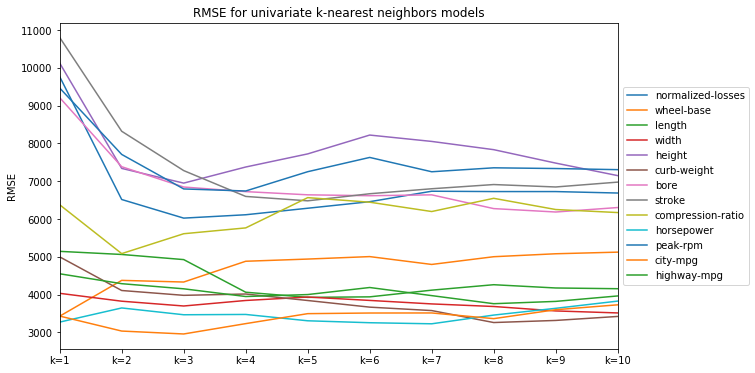

min RMSE 2960.58 for ('k=3', 'city-mpg')


In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

#add one line for each feature to the plot
fig = plt.figure(figsize=(10,6))
for col in col_features:
    rmse_results.loc[col].plot(label=col)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel("RMSE")
plt.title("RMSE for univariate k-nearest neighbors models")
plt.show()

#find min RMSE
rmse_min=(rmse_results==rmse_results.min().min()).dot(rmse_results.columns)
rmse_min=rmse_min.loc[rmse_min!='']
rmse_min = list(zip(rmse_min,rmse_min.index))
print("min RMSE %.2f for %s"%(rmse_results.min().min(),rmse_min[0]))


## find best features using mean RMSE across different k-values

In [9]:
top_features = rmse_results.mean(axis=1)
top_features = top_features.sort_values()
print(top_features)
top2 = list(top_features.head(2).index)
top3 = list(top_features.head(3).index)
top4 = list(top_features.head(4).index)
top5 = list(top_features.head(5).index)
top6 = list(top_features.head(6).index)

city-mpg             3389.684201
horsepower           3459.799622
width                3772.829868
curb-weight          3821.487339
highway-mpg          4067.081080
length               4379.519295
wheel-base           4699.254881
compression-ratio    6103.461468
normalized-losses    6805.694509
bore                 6884.579576
stroke               7370.927542
peak-rpm             7485.839306
height               7826.896066
dtype: float64


## multivariate k-nearest neighbors models

In [10]:
def knn_train_test(k, train_col, target_col, df):
    x_train, x_test, y_train, y_test = train_test_split(df[train_col], df[target_col], test_size=0.25, random_state=1)
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(x_train, y_train)
    prediction = knn.predict(x_test)
    rmse = np.sqrt(mean_squared_error(y_test, prediction))
    return rmse

print("RMSE for k=5 and features: %s :\n%.2f\n-----"%(top2, knn_train_test(5, top2, "price", cars)))
print("RMSE for k=5 and features: %s :\n%.2f\n-----"%(top3, knn_train_test(5, top3, "price", cars)))
print("RMSE for k=5 and features: %s :\n%.2f\n-----"%(top4, knn_train_test(5, top4, "price", cars)))
print("RMSE for k=5 and features: %s :\n%.2f\n-----"%(top5, knn_train_test(5, top5, "price", cars)))
print("RMSE for k=5 and features: %s :\n%.2f\n-----"%(top6, knn_train_test(5, top6, "price", cars)))


RMSE for k=5 and features: ['city-mpg', 'horsepower'] :
3790.51
-----
RMSE for k=5 and features: ['city-mpg', 'horsepower', 'width'] :
2487.81
-----
RMSE for k=5 and features: ['city-mpg', 'horsepower', 'width', 'curb-weight'] :
2345.10
-----
RMSE for k=5 and features: ['city-mpg', 'horsepower', 'width', 'curb-weight', 'highway-mpg'] :
2401.59
-----
RMSE for k=5 and features: ['city-mpg', 'horsepower', 'width', 'curb-weight', 'highway-mpg', 'length'] :
2830.21
-----


### the best model so far is: k=5 including the 
- top4 features (city-mpg, horsepower, width, curb-weight)
- top5 features (city-mpg, horsepower, width, curb-weight, highway-mpg)
- top3 features (city-mpg, horsepower, width)

### optimize these models by changing k-value

In [11]:
k_values = np.arange(1,26)
top3_models = [top4, top5, top3]
rmse_list = []
rmse_total = []

#add rmse result for each model and each k-value to a list
for model in top3_models:
    for k in k_values:
        rmse = knn_train_test(k, model, "price", cars)
        rmse_list.append(rmse)
    rmse_total.append(rmse_list)
    rmse_list = []


rmse_results = pd.DataFrame(rmse_total, columns = k_values,
                            index = ["city-mpg, horsepower, width, curb-weight",
                                     "city-mpg, horsepower, width, curb-weight, highway-mpg",
                                     "city-mpg, horsepower, width"]
                          )

rmse_results

,1,2,3,4,5,6,7,8,9,10,...,16,17,18,19,20,21,22,23,24,25
"city-mpg, horsepower, width, curb-weight",2831.199136,2043.629949,2016.518612,2136.092796,2345.096244,2515.511442,2547.230200,2674.548003,2804.299994,2839.042978,...,3042.200504,3130.378245,3223.466485,3325.579892,3340.302163,3333.952180,3351.066268,3376.092063,3412.313852,3471.414828
"city-mpg, horsepower, width, curb-weight, highway-mpg",2722.817781,2353.838024,2226.673928,2263.799075,2401.587869,2581.168563,2575.588447,2693.115564,2795.781287,2934.136353,...,3187.887257,3273.766695,3392.509279,3396.026663,3356.773045,3314.909024,3307.152896,3371.633230,3441.166774,3503.370099
"city-mpg, horsepower, width",3116.966537,2839.590305,2472.657075,2413.366586,2487.812424,2529.546411,2625.003157,2751.844817,2795.925685,2837.603438,...,3603.194575,3677.564765,3667.824090,3611.666361,3657.666191,3657.148209,3633.261714,3508.502956,3569.370808,3604.394675


### plot results

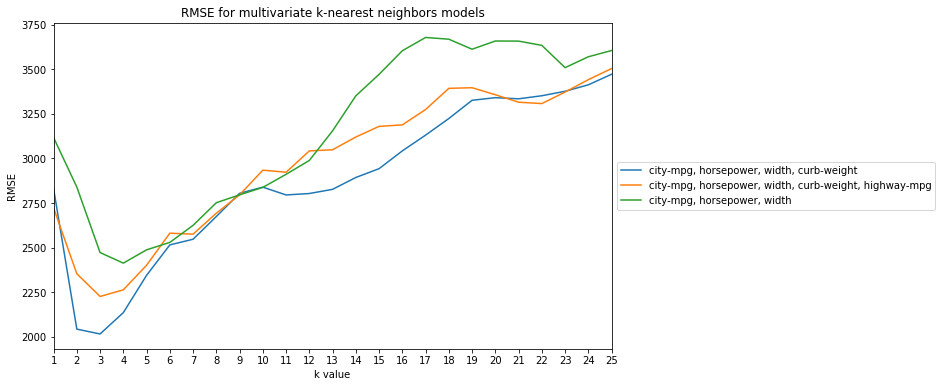

In [12]:
fig = plt.figure(figsize=(10,6))

rmse_results.loc["city-mpg, horsepower, width, curb-weight"].plot(label="city-mpg, horsepower, width, curb-weight")
rmse_results.loc["city-mpg, horsepower, width, curb-weight, highway-mpg"].plot(label="city-mpg, horsepower, width, curb-weight, highway-mpg")
rmse_results.loc["city-mpg, horsepower, width"].plot(label="city-mpg, horsepower, width")

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel("RMSE")
plt.xlabel("k value")
plt.title("RMSE for multivariate k-nearest neighbors models")
plt.xticks(k_values)
plt.show()


### &rarr; best model: 
- 4 features (city-mpg, horsepower, width, curb-weight) with k-value = 3
- 5 features (city-mpg, horsepower, width, curb-weight, highway-mpg) with k-value = 3
- 3 features (city-mpg, horsepower, width) with k-value = 4

### using cross validation to validate the best 3 models:

In [13]:
from sklearn.model_selection import cross_val_score, KFold

#num_folds = [3, 5, 7, 9, 10, 11, 13, 15, 17, 19, 21, 23


kf = KFold(10, shuffle=True, random_state=1)
knn = KNeighborsRegressor(4)
mses = cross_val_score(knn, cars[top3], cars[["price"]], scoring="neg_mean_squared_error", cv=kf)
avg_rmes = np.mean(np.sqrt(np.absolute(mses)))
print("avg RMSE using cross-validation(fold=10) for 3 features, k=4 %s\n%.2f\n----"%(top3, avg_rmes))
             
kf = KFold(10, shuffle=True, random_state=1)
knn = KNeighborsRegressor(3)
mses = cross_val_score(knn, cars[top4], cars[["price"]], scoring="neg_mean_squared_error", cv=kf)
avg_rmes = np.mean(np.sqrt(np.absolute(mses)))
print("avg RMSE using cross-validation(fold=10) for 4 features, k=3 %s\n%.2f\n----"%(top4, avg_rmes))   

kf = KFold(10, shuffle=True, random_state=1)
knn = KNeighborsRegressor(3)
mses = cross_val_score(knn, cars[top5], cars[["price"]], scoring="neg_mean_squared_error", cv=kf)
avg_rmes = np.mean(np.sqrt(np.absolute(mses)))
print("avg RMSE using cross-validation(fold=10) for 5 features, k=3 %s\n%.2f\n----"%(top5, avg_rmes))    



avg RMSE using cross-validation(fold=10) for 3 features, k=4 ['city-mpg', 'horsepower', 'width']
3081.65
----
avg RMSE using cross-validation(fold=10) for 4 features, k=3 ['city-mpg', 'horsepower', 'width', 'curb-weight']
2793.04
----
avg RMSE using cross-validation(fold=10) for 5 features, k=3 ['city-mpg', 'horsepower', 'width', 'curb-weight', 'highway-mpg']
2872.30
----


### &rarr; best model using cross validation with 10 folds: 
- 4 features (city-mpg, horsepower, width, curb-weight) with k-value = 3
- 5 features (city-mpg, horsepower, width, curb-weight, highway-mpg) with k-value = 3
- 3 features (city-mpg, horsepower, width) with k-value = 4

&rarr; same ranking as before

### using the best model to predict a price:

In [14]:
cols = top4.copy()
cols.append("price")

In [25]:

car_data = cars[cols]

new_car = pd.DataFrame([[40, 237, 71, 4000, np.NaN]], columns = cols)
print(new_car)
#normalize new_car
new_car=(new_car-cars_clean[cols].min())/(cars_clean[cols].max()-cars_clean[cols].min())

knn = KNeighborsRegressor(3)
knn.fit(car_data[top4], car_data[["price"]])
new_car_price = knn.predict(new_car[top4])
print("predicted price: %.2f"%new_car_price[0][0])


   city-mpg  horsepower  width  curb-weight  price
0        40         237     71         4000    NaN
predicted price: 28466.67
